In [1]:
import SimpleITK as sitk, numpy as np, torch, nrrd, pandas as pd, glob, os

In [2]:
evaluation = pd.read_csv("/Users/joemarsilla/ptl-oar-segmentation/paper/csv/Median_Performance_External_validation_01052022.csv")

In [3]:
evaluation.head()

,OAR,VolDice,95HD,SurfDist,VolDice_std,95HD_std,SurfDist_std,Observer,Counts
0,BSTEM,0.839614,3.000000,1.249724,0.046400,0.883294,0.407904,rad_radiographer,59
1,CHIASM,0.401028,5.099020,1.238545,0.183534,3.943288,1.468696,rad_radiographer,59
2,ESOPH,0.827362,3.162278,1.070790,0.071651,5.481063,0.570488,rad_radiographer,59
3,LACOU,0.791837,1.573132,0.670757,0.174297,9.785202,8.414200,rad_radiographer,59
4,LARYNX,0.876082,2.236068,0.922978,0.061593,1.379823,1.484772,rad_radiographer,59


In [4]:
def vectorEval(data):
    return data["VolDice"]*100/(data["95HD"] + data["SurfDist"])

# def vectorEval2(data):
#     return data["VolDice"]*100/(data["95HD"]*data["SurfDist"])

In [5]:
unique_oars = list(evaluation.OAR.unique())
eval_1 = {}
stack_ = []

In [6]:
for oar in unique_oars:
    dat = evaluation[evaluation["OAR"]==oar]
    dat["EVAL"] = vectorEval(dat)
    # dat["EVAL4"] = vectorEval2(dat)
    stack_.append(dat)
# bstem = vectorEval(evaluation[evaluation["OAR"]=="BSTEM"])

/var/folders/4n/x4ks02rx2g9925jn6xb07jkw0000gn/T/ipykernel_8682/2804758442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["EVAL"] = vectorEval(dat)


In [7]:
data_ = pd.concat(stack_)

In [8]:
import seaborn as sea
import matplotlib.pyplot as plt

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


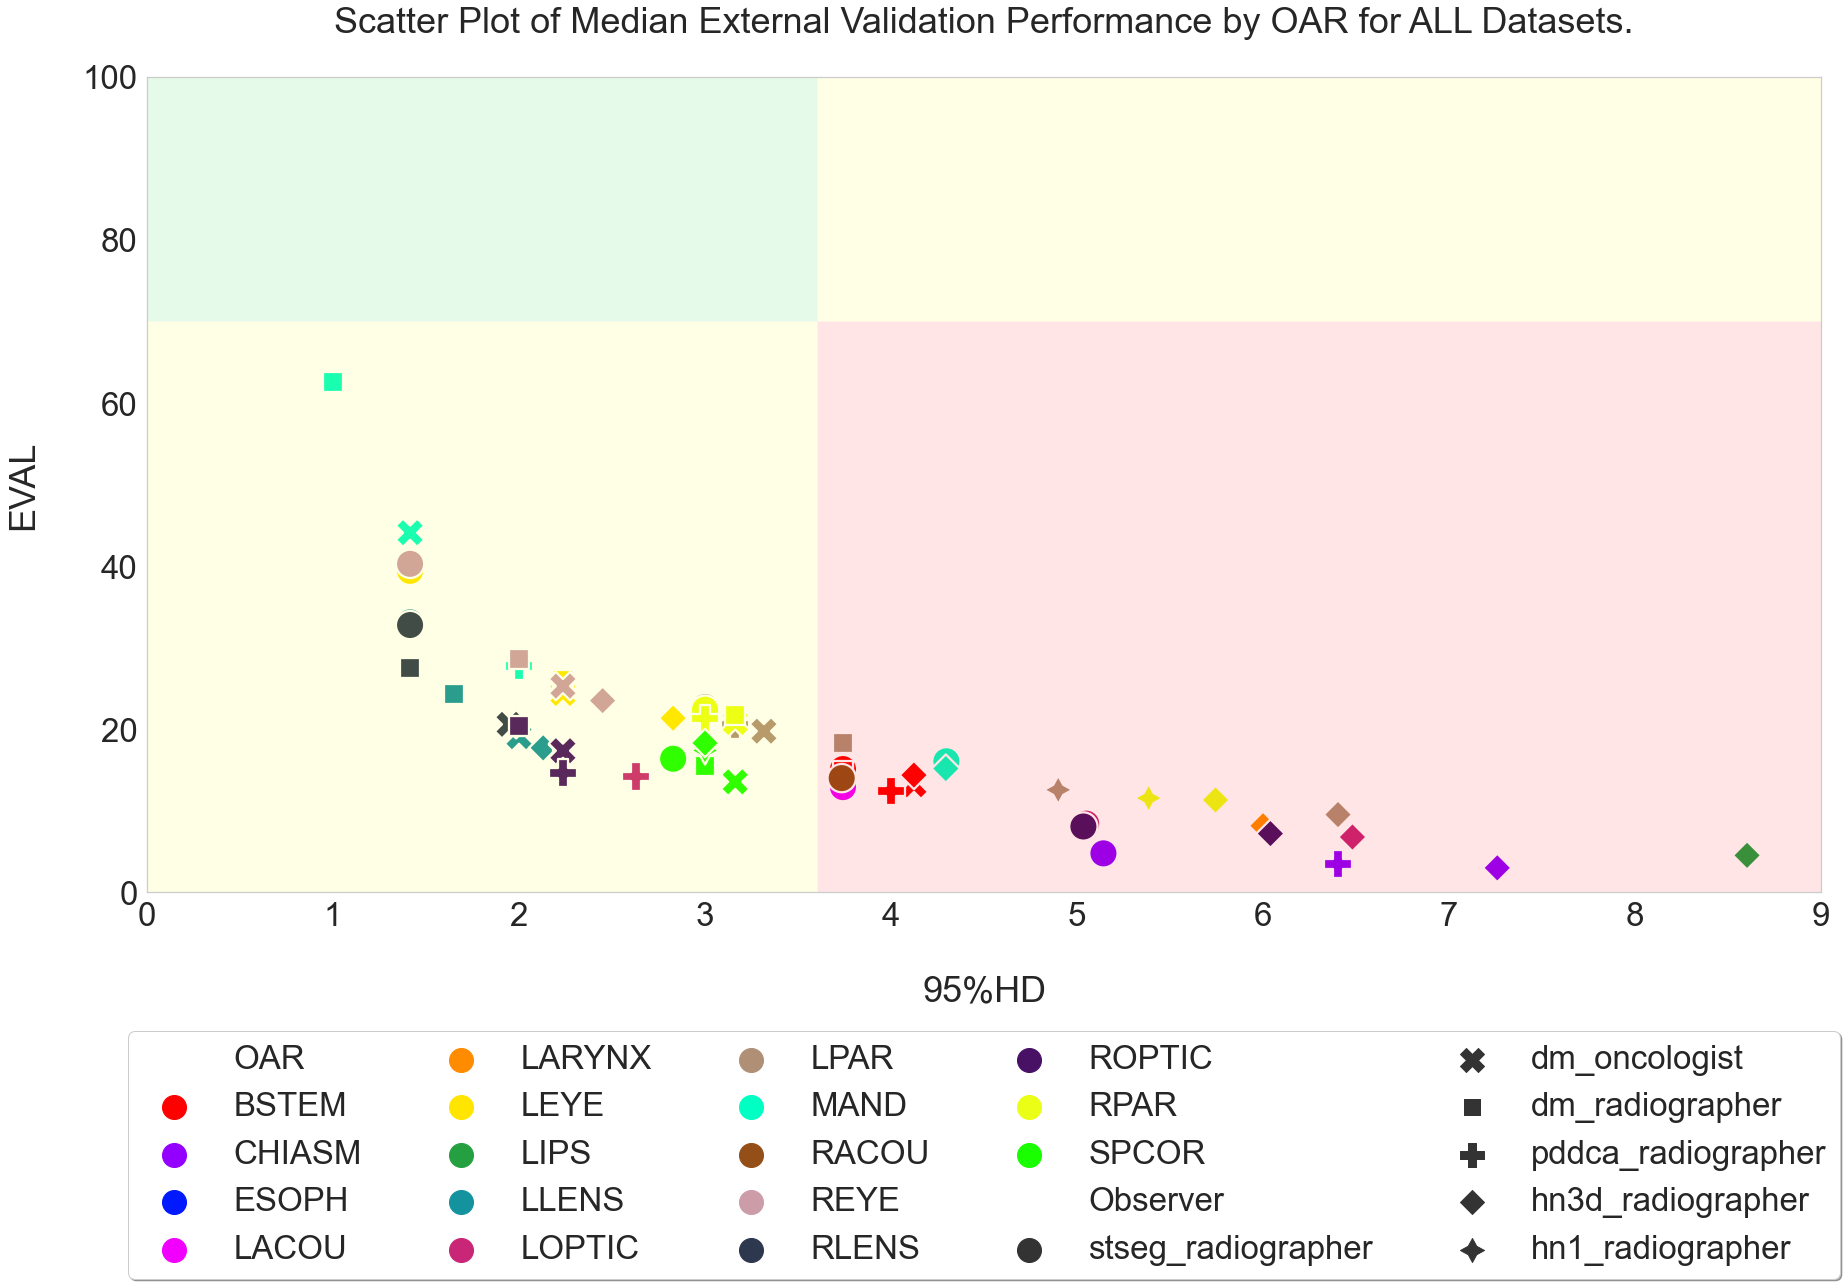

In [17]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
# colors.sort()
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR for ALL Datasets.\n')
plt.ylim(0.0, 100.0)
plt.xlim(0,9)
plt.ylabel('EVAL\n')
plt.xlabel('\n95%HD')
# exclude = [] #['LACOU', 'RACOU']
# data_ = data_median[~data_median.OAR.isin(exclude)]
# data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer'] #,
unique = list(data_.Observer.unique())
exclude = [d for d in unique if d not in include]
data_ = data_[~data_.Observer.isin(include)]
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(exclude, inplace=True)
data_.sort_values(["Observer"])
inc = ['rad_radiographer']
include = list(data_[~data_.Observer.isin(inc)]['OAR'].unique())
data_ = data_[data_.OAR.isin(include)]

# data_.Observer = df.Tm.astype("category")
# data_.Observer.set_categories(include, inplace=True)
# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
# data_['95HD'] = jitter(np.array(data_['95HD']), 0)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
# plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='EVAL', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(70, 100., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(70, 100., xmin=.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, 70, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, 70, xmin=.40,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

In [24]:
data_.EVAL.mean()

18.645142259446768